In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm, trange
import os
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
import warnings  
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("data.csv",header=0)
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

#fmean= list(df.columns[1:11])
#fse= list(df.columns[11:20])
#fworst=list(df.columns[21:31])

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [3]:
fmean=df.iloc[:,1:11]
fse=df.iloc[:,11:21]
fworst=df.iloc[:,21:31]
fall=df.iloc[:,1:31]

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

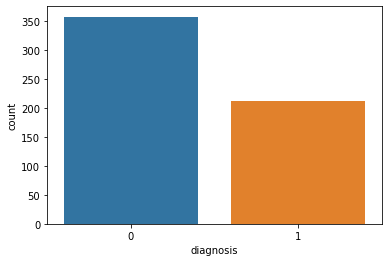

In [6]:
sns.countplot(df['diagnosis'],label="Count")

In [7]:
from sklearn import tree, ensemble
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(random_state=100)
rf = RandomForestClassifier(n_estimators = 100,random_state=100)
svm = SVC(random_state=100)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,3), random_state=100)
dt = DecisionTreeClassifier(random_state=100)
kn = KNeighborsClassifier(n_neighbors=3)

In [8]:
def data_base(data):
    
    
    #split X and y
    X = data
    y = df.iloc[:,0]

    
    lr_scores = cross_val_score(lr, X, y, cv = 5, scoring='accuracy')
    lr_scores_m = str(100*round(lr_scores.mean(),4)) + "%"

    rf_scores = cross_val_score(rf, X, y, cv = 5, scoring='accuracy')
    rf_scores_m = str(100*round(rf_scores.mean(),4)) + "%"

    svm_scores = cross_val_score(svm, X, y, cv = 5, scoring='accuracy')
    svm_scores_m = str(100*round(svm_scores.mean(),4)) + "%"

    dt_scores = cross_val_score(dt, X, y, cv = 5, scoring='accuracy')
    dt_scores_m = str(100*round(dt_scores.mean(),4)) + "%"

    kn_scores = cross_val_score(kn, X, y, cv = 5, scoring='accuracy')
    kn_scores_m = str(100*round(kn_scores.mean(),4)) + "%"

    rows = [(lr_scores_m, rf_scores_m, svm_scores_m, dt_scores_m, kn_scores_m)]
    
    table = pd.DataFrame(rows, columns=model)
    
    return table

In [9]:
model = ['lr','rf','svm','dt','kn']
index = ['mean','se','worst','all']
data = [fmean, fse, fworst, fall]
baseline_table = pd.DataFrame(columns=model)
for i in tqdm(data) :
    base_rows = []
    base_rows = data_base(i)
    baseline_table = pd.concat([baseline_table,base_rows],axis=0)

baseline_table['data'] = index
baseline_table.set_index('data')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.58it/s]


,lr,rf,svm,dt,kn
data,,,,,
mean,90.86%,94.38%,88.58%,91.92%,87.87%
se,88.92999999999999%,88.4%,86.65%,82.42%,84.89%
worst,94.73%,95.43%,91.92%,93.32000000000001%,90.86%
all,93.85%,96.13000000000001%,91.22%,91.39%,91.91%


In [28]:
X = fall
y = df.iloc[:,0]

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
acc = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


print(acc)
print(recall)
print(f1)

0.961335676625659
0.9292452830188679
0.9471153846153846


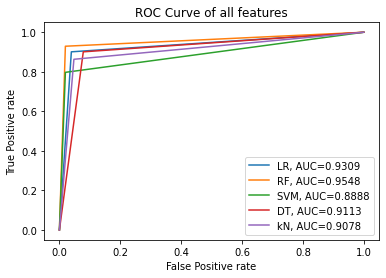

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
#set up plotting area
fig, ax = plt.subplots()

X = fall
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="LR, AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="RF, AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="SVM, AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="DT, AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="kN, AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('ROC Curve of all features')
ax.set_ylabel('True Positive rate')
ax.set_xlabel('False Positive rate')
plt.legend()

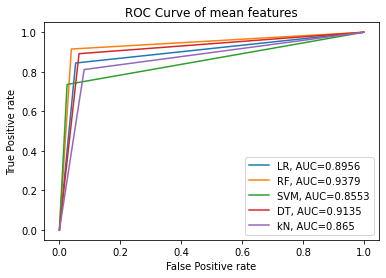

In [11]:
fig, ax = plt.subplots()

X = fmean
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="LR, AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="RF, AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="SVM, AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="DT, AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="kN, AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('ROC Curve of mean features')
ax.set_ylabel('True Positive rate')
ax.set_xlabel('False Positive rate')
plt.legend()

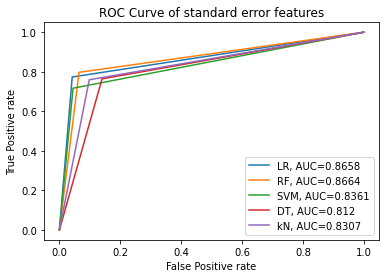

In [12]:
fig, ax = plt.subplots()

X = fse
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="LR, AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="RF, AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="SVM, AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="DT, AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="kN, AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('ROC Curve of standard error features')
ax.set_ylabel('True Positive rate')
ax.set_xlabel('False Positive rate')
plt.legend()

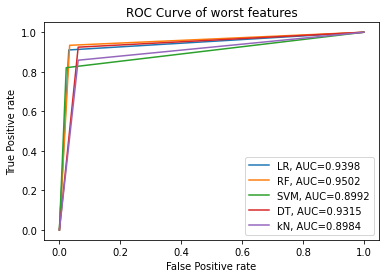

In [13]:
fig, ax = plt.subplots()

X = fworst
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="LR, AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="RF, AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="SVM, AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="DT, AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr,label="kN, AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('ROC Curve of worst features')
ax.set_ylabel('True Positive rate')
ax.set_xlabel('False Positive rate')
plt.legend()

# PR-curve

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, auc, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

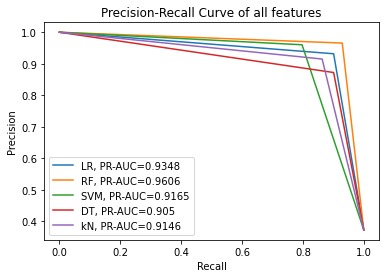

In [15]:
#set up plotting area
fig, ax = plt.subplots()

X = fall
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="LR, PR-AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="RF, PR-AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="SVM, PR-AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="DT, PR-AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="kN, PR-AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('Precision-Recall Curve of all features')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend()

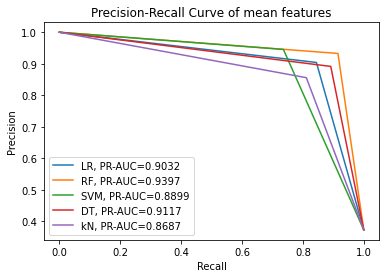

In [16]:
#set up plotting area
fig, ax = plt.subplots()

X = fmean
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="LR, PR-AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="RF, PR-AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="SVM, PR-AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="DT, PR-AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="kN, PR-AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('Precision-Recall Curve of mean features')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend()

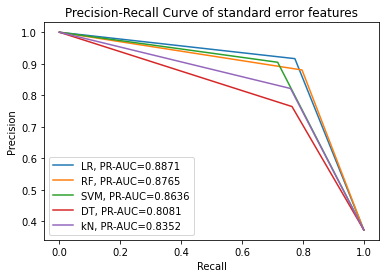

In [17]:
#set up plotting area
fig, ax = plt.subplots()

X = fse
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="LR, PR-AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="RF, PR-AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="SVM, PR-AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="DT, PR-AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="kN, PR-AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('Precision-Recall Curve of standard error features')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend()

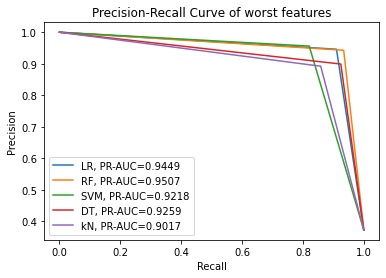

In [18]:
#set up plotting area
fig, ax = plt.subplots()

X = fworst
y = df.iloc[:,0]

#fit logistic regression model and plot ROC curve
y_pred = cross_val_predict(lr, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="LR, PR-AUC="+str(round(auc_score,4)))

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="RF, PR-AUC="+str(round(auc_score,4)))

#fit svm model and plot ROC curve
y_pred = cross_val_predict(svm, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="SVM, PR-AUC="+str(round(auc_score,4)))

#fit DecisionTree model and plot ROC curve
y_pred = cross_val_predict(dt, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="DT, PR-AUC="+str(round(auc_score,4)))

#fit KNeighbors model and plot ROC curve
y_pred = cross_val_predict(kn, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
auc_score = auc(recall, precision)
plt.plot(recall, precision,label="kN, PR-AUC="+str(round(auc_score,4)))

#add legend
#add axis labels to plot
ax.set_title('Precision-Recall Curve of worst features')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend()

In [19]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
nm = NearMiss()
sm = SMOTE(random_state=100)
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, average_precision_score
from statistics import mean

auc_roc = []
kf = KFold(n_splits=5)

X = fall
y = df.iloc[:,0]


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_near, Y_near = nm.fit_sample(X_train, y_train.ravel())
    
    rf.fit(X_near, Y_near.ravel()) 
    y_pred = rf.predict(X_test) 

    auc_roc.append(average_precision_score(y_test, y_pred))


print('PR Curve of nearmiss = {} '.format(np.round(mean(auc_roc),4)))

PR Curve of nearmiss = 0.902 


In [20]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_near, Y_near = sm.fit_sample(X_train, y_train.ravel())
    
    rf.fit(X_near, Y_near.ravel()) 
    y_pred = rf.predict(X_test) 

    auc_roc.append(average_precision_score(y_test, y_pred))


print('PR Curve of SMOTE = {} '.format(np.round(mean(auc_roc),4)))

PR Curve of SMOTE = 0.9153 


In [21]:
X = fall
y = df.iloc[:,0]

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
acc = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
#auc_score = auc(recall, precision)
#plt.plot(recall, precision,label="RF, PR-AUC="+str(round(auc_score,4)))



print(acc)
print(recall)
print(f1)

0.961335676625659
0.9292452830188679
0.9471153846153846


Text(0.5, 0, 'Random Forest Feature Importance')

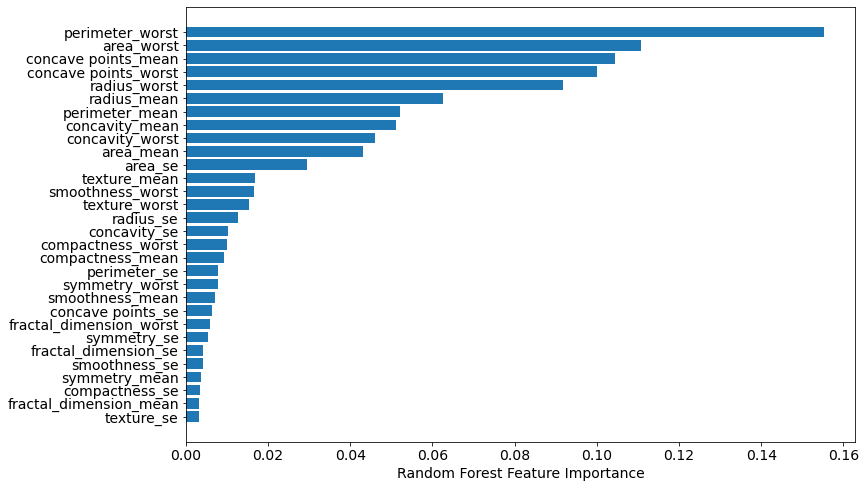

In [22]:
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(fall.columns.values[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [23]:
fall.columns.values[sorted_idx]

array(['texture_se', 'fractal_dimension_mean', 'compactness_se',
       'symmetry_mean', 'smoothness_se', 'fractal_dimension_se',
       'symmetry_se', 'fractal_dimension_worst', 'concave points_se',
       'smoothness_mean', 'symmetry_worst', 'perimeter_se',
       'compactness_mean', 'compactness_worst', 'concavity_se',
       'radius_se', 'texture_worst', 'smoothness_worst', 'texture_mean',
       'area_se', 'area_mean', 'concavity_worst', 'concavity_mean',
       'perimeter_mean', 'radius_mean', 'radius_worst',
       'concave points_worst', 'concave points_mean', 'area_worst',
       'perimeter_worst'], dtype=object)

In [35]:
#only 10 columns

X = fall[['concavity_se','radius_se','texture_worst','smoothness_worst','texture_mean','area_se','area_mean', 'concavity_worst', 'concavity_mean',
       'perimeter_mean', 'radius_mean', 'radius_worst',
       'concave points_worst', 'concave points_mean', 'area_worst',
       'perimeter_worst']]
y = df.iloc[:,0]

#fit random forest model and plot ROC curve
y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
acc = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


print(acc)
print(recall)
print(f1)

y_pred = cross_val_predict(rf, X, y, cv=5)
fpr, tpr, _ = roc_curve(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
print(auc_score)

y_pred = cross_val_predict(rf, X, y, cv=5)
precision, recall, thresholds = precision_recall_curve(y, y_pred)
prauc_score = auc(recall, precision)
print(prauc_score)


0.9648506151142355
0.9386792452830188
0.9521531100478469
0.959535701072882
0.9637728814672469


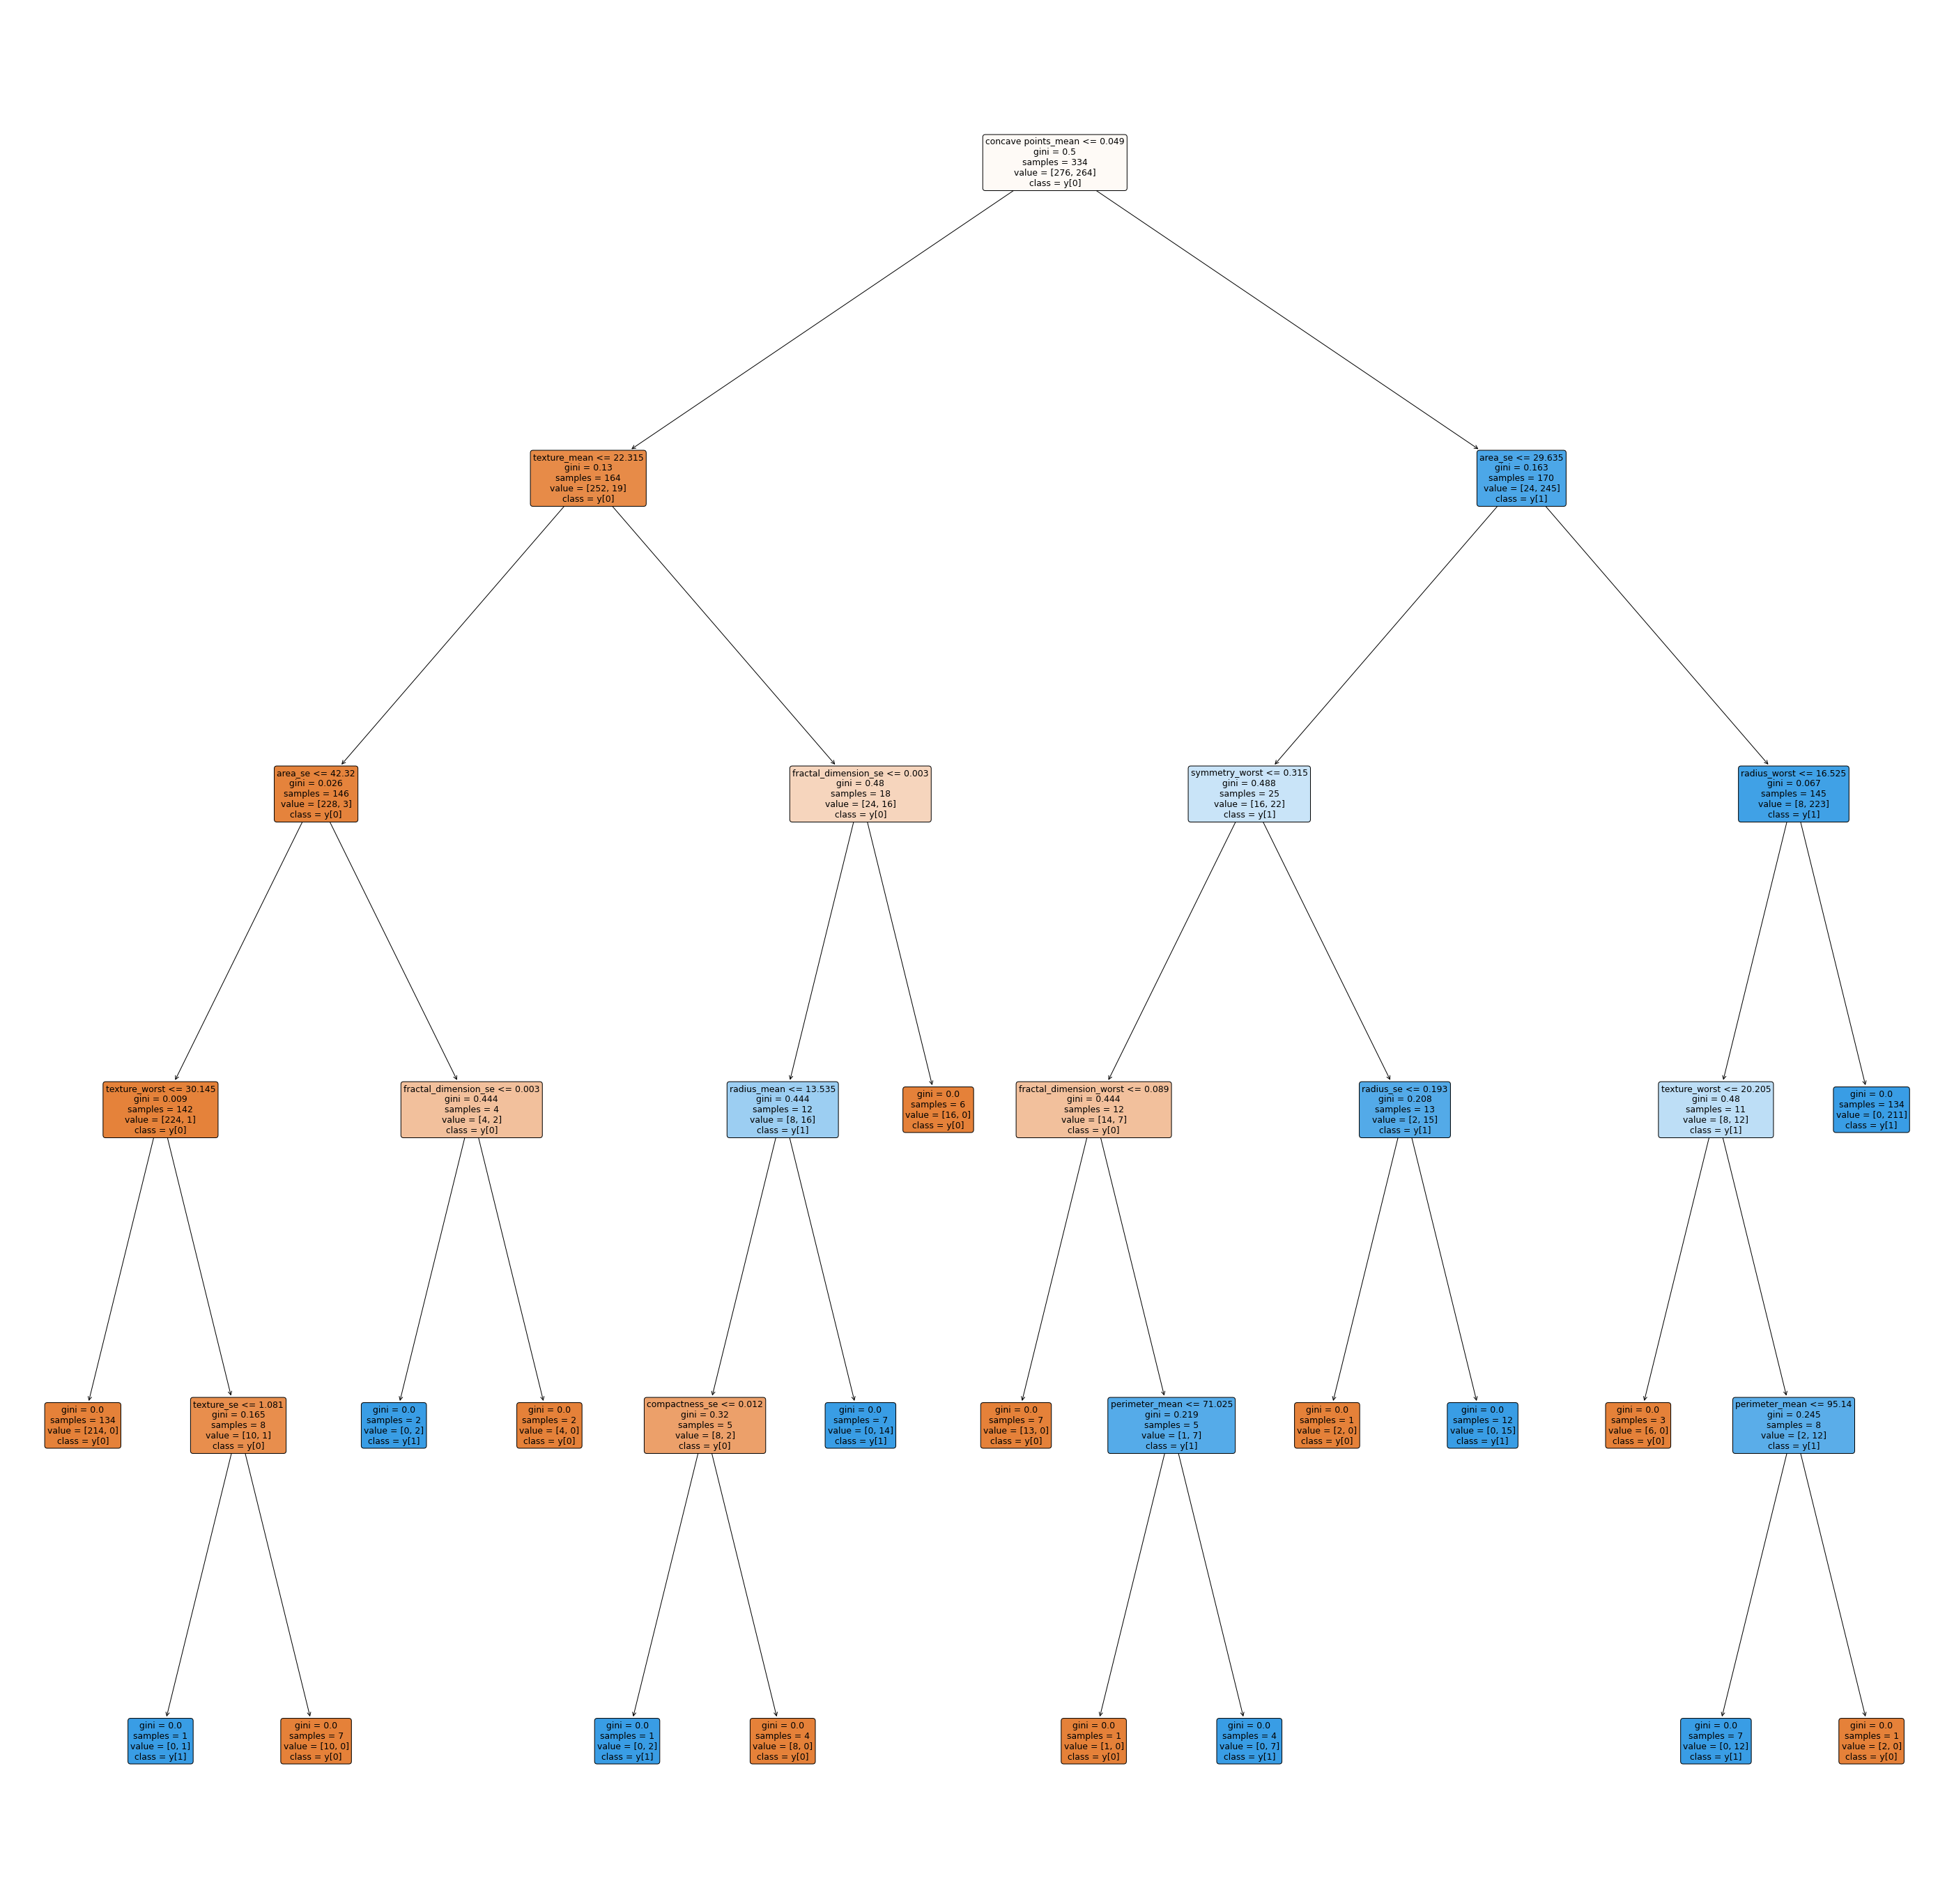

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(50, 50))
plot_tree(rf.estimators_[1],feature_names=fall.columns.values,class_names=True,filled=True, impurity=True, 
          rounded=True)
plt.show()
#fig.savefig('tree.png')

In [26]:
np.where(y!=y_pred)[0]

array([ 13,  38,  40,  41,  73,  81,  86,  89,  91,  99, 100, 112, 126,
       128, 133, 135, 148, 157, 193, 209, 247, 261, 263, 297, 385, 406,
       414, 421, 472, 484, 491, 536], dtype=int64)

In [27]:
df.iloc[[ 13,  38,  40,  41,  73,  81,  86,  89,  91,  99, 100, 112, 126,
       128, 133, 135, 148, 157, 193, 209, 247, 261, 263, 297, 385, 406,
       414, 421, 472, 484, 491, 536]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287
38,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
40,1,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
41,1,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
73,1,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,...,16.57,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300
81,0,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,...,15.53,23.19,96.66,614.9,0.15360,0.47910,0.48580,0.17080,0.3527,0.10160
86,1,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,...,16.21,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846
89,0,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
91,1,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,...,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828
99,1,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,...,16.33,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353
